Amazon Reviews Sentiment Analysis using VADER

Steps:
1. Download and prepare the dataset
2. Perform sentiment analysis
3. Compare sentiment with ratings
4. Visualize using boxplots and word clouds

In [1]:
import pandas as pd
import kagglehub
import os
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

In [2]:
# Step 1: Load the dataset
path = kagglehub.dataset_download("dongrelaxman/amazon-reviews-dataset")
print("Dataset path:", path)

amazon_csv = os.path.join(path, "Amazon_Reviews.csv")
df = pd.read_csv(
    amazon_csv,
    encoding='utf-8',
    sep=',',
    quotechar='"',
    on_bad_lines='skip',
    engine='python'
)

# Clean and check
df = df[df['Review Text'].notna()].copy()
print(df[['Review Text', 'Rating']].head())

100%|██████████| 4.59M/4.59M [00:00<00:00, 44.7MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/dongrelaxman/amazon-reviews-dataset/versions/1
                                         Review Text                  Rating
0  I registered on the website, tried to order a ...  Rated 1 out of 5 stars
1  Had multiple orders one turned up and driver h...  Rated 1 out of 5 stars
2  I informed these reprobates that I WOULD NOT B...  Rated 1 out of 5 stars
3  I have bought from Amazon before and no proble...  Rated 1 out of 5 stars
4  If I could give a lower rate I would! I cancel...  Rated 1 out of 5 stars


In [3]:
# Step 2: Sentiment Analysis with VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df.columns = df.columns.str.strip().str.lower()

df['sentiment_score'] = df['review text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Distribution
print("Review count by sentiment:")
print(df['sentiment_label'].value_counts())
print("\nSentiment percentages:")
print(df['sentiment_label'].value_counts(normalize=True) * 100)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Review count by sentiment:
sentiment_label
Positive    10284
Negative     9296
Neutral      1475
Name: count, dtype: int64

Sentiment percentages:
sentiment_label
Positive    48.843505
Negative    44.151033
Neutral      7.005462
Name: proportion, dtype: float64


In [4]:
# Step 3: Most positive/negative reviews
most_positive = df.loc[df['sentiment_score'].idxmax()]
most_negative = df.loc[df['sentiment_score'].idxmin()]

print("\nMost Positive Review:\n", most_positive['review text'])
print("\nMost Negative Review:\n", most_negative['review text'])



Most Positive Review:
 At Amazon the customer service representatives are not trained well and Amazon does not care. For instance, I bought a $ 5373.98 zero turn motor from a third party seller on Amazon. I had to summit an A to Z claim because I received a damaged unusable mower due to a crushed mower deck underneath unit. I won the claim at first but an Amazon employee  told me that I won it and since my banking services (Amazon visa credit card) due date was in a day or two,  he told me to dispute it with credit card, because it was  refunded and I wouldn’t be penalized for the dispute.  So A to Z took refund back, if you dispute the amount on your credit card A to Z won’t honor their refund.   Amazon didn’t care even if I had submitted a  Notarized witness statement of a friend visiting and who heard speaker phone calls.  Also had an witness to mover problems. Then Amazon told me to cancel dispute again. That this change would get my refund back.  Again she witnessed the speaker p

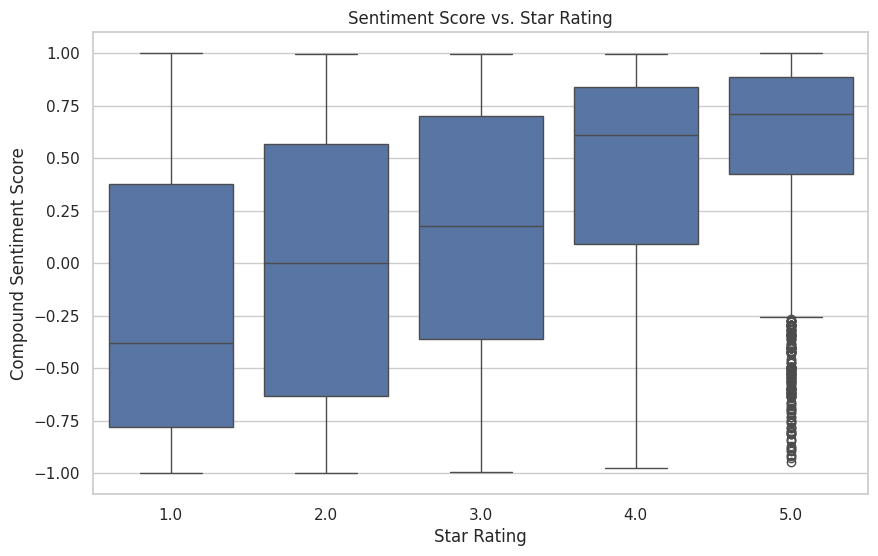


Number of mismatched reviews (sentiment vs rating): 5461


In [5]:
# Step 4: Sentiment vs. Rating
df['rating_clean'] = df['rating'].str.extract(r'(\d+)').astype(float)
df = df[df['rating_clean'].notna()]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rating_clean', y='sentiment_score')
plt.title("Sentiment Score vs. Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Compound Sentiment Score")
plt.show()

misaligned = df[((df['sentiment_label'] == 'Positive') & (df['rating_clean'] <= 2)) |
                ((df['sentiment_label'] == 'Negative') & (df['rating_clean'] >= 4))]
print(f"\nNumber of mismatched reviews (sentiment vs rating): {len(misaligned)}")

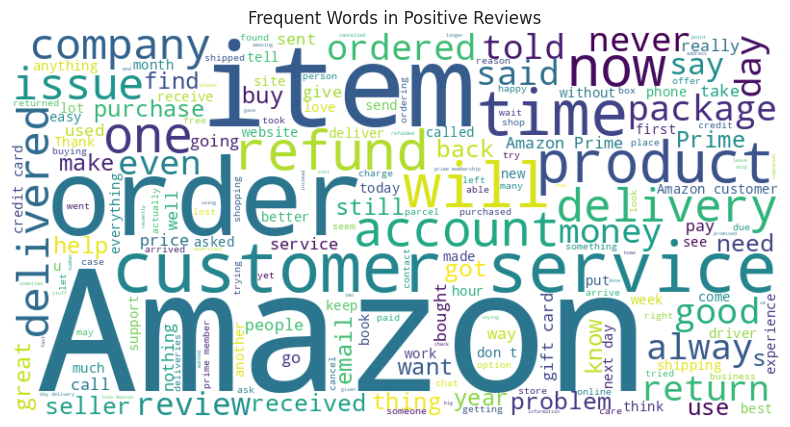

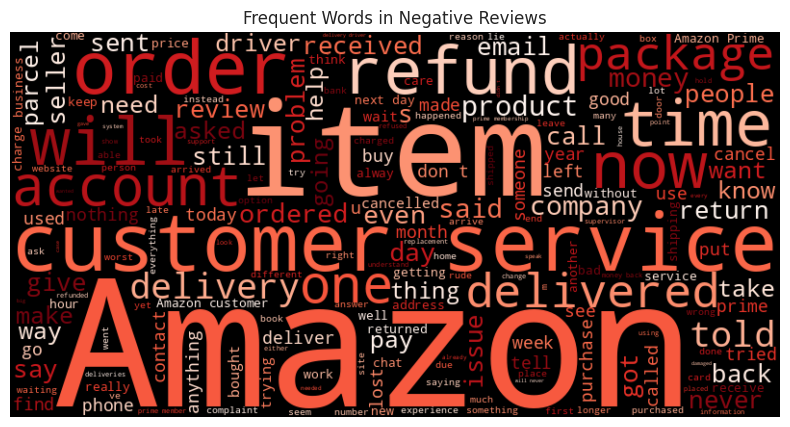

In [6]:
# Step 5: WordClouds
positive_text = " ".join(df[df['sentiment_label'] == 'Positive']['review text'].dropna())
negative_text = " ".join(df[df['sentiment_label'] == 'Negative']['review text'].dropna())

# Positive WordCloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Positive Reviews")
plt.show()

# Negative WordCloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Frequent Words in Negative Reviews")
plt.show()